In [1]:
options(jupyter.rich_display=FALSE) # Create output as usual in R

In [2]:
library(quanteda)

Package version: 2.1.1

Parallel computing: 2 of 12 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: ‘quanteda’


The following object is masked from ‘jupyter:irkernel’:

    View


The following object is masked from ‘package:utils’:

    View




In [3]:
quanteda_options(print_corpus_max_ndoc=3)

In [4]:
# This is an example corpus contained in the 'quanteda' package
data_corpus_inaugural

Corpus consisting of 58 documents and 4 docvars.
1789-Washington :
"Fellow-Citizens of the Senate and of the House of Representa..."

1793-Washington :
"Fellow citizens, I am again called upon by the voice of my c..."

1797-Adams :
"When it was first perceived, in early times, that no middle ..."

[ reached max_ndoc ... 55 more documents ]

In [5]:
mode(data_corpus_inaugural)

[1] "character"

In [6]:
class(data_corpus_inaugural)

[1] "corpus"    "character"

In [7]:
data_corpus_inaugural[1:3]

Corpus consisting of 3 documents and 4 docvars.
1789-Washington :
"Fellow-Citizens of the Senate and of the House of Representa..."

1793-Washington :
"Fellow citizens, I am again called upon by the voice of my c..."

1797-Adams :
"When it was first perceived, in early times, that no middle ..."


In [8]:
str(docvars(data_corpus_inaugural))

'data.frame':	58 obs. of  4 variables:
 $ Year     : int  1789 1793 1797 1801 1805 1809 1813 1817 1821 1825 ...
 $ President: chr  "Washington" "Washington" "Adams" "Jefferson" ...
 $ FirstName: chr  "George" "George" "John" "Thomas" ...
 $ Party    : Factor w/ 6 levels "Democratic","Democratic-Republican",..: 4 4 3 2 2 2 2 2 2 2 ...


In [9]:
docvars(data_corpus_inaugural,"Year")

 [1] 1789 1793 1797 1801 1805 1809 1813 1817 1821 1825 1829 1833 1837 1841 1845
[16] 1849 1853 1857 1861 1865 1869 1873 1877 1881 1885 1889 1893 1897 1901 1905
[31] 1909 1913 1917 1921 1925 1929 1933 1937 1941 1945 1949 1953 1957 1961 1965
[46] 1969 1973 1977 1981 1985 1989 1993 1997 2001 2005 2009 2013 2017

In [10]:
data_corpus_inaugural$Year

 [1] 1789 1793 1797 1801 1805 1809 1813 1817 1821 1825 1829 1833 1837 1841 1845
[16] 1849 1853 1857 1861 1865 1869 1873 1877 1881 1885 1889 1893 1897 1901 1905
[31] 1909 1913 1917 1921 1925 1929 1933 1937 1941 1945 1949 1953 1957 1961 1965
[46] 1969 1973 1977 1981 1985 1989 1993 1997 2001 2005 2009 2013 2017

In [11]:
corpus_subset(data_corpus_inaugural, Year > 1945)

Corpus consisting of 18 documents and 4 docvars.
1949-Truman :
"Mr. Vice President, Mr. Chief Justice, and fellow citizens, ..."

1953-Eisenhower :
"My friends, before I begin the expression of those thoughts ..."

1957-Eisenhower :
"The Price of Peace Mr. Chairman, Mr. Vice President, Mr. Chi..."

[ reached max_ndoc ... 15 more documents ]

In [12]:
subset.corpus <- function(x,...) corpus_subset(x,...)

In [13]:
subset(data_corpus_inaugural, Year > 1945)

Corpus consisting of 18 documents and 4 docvars.
1949-Truman :
"Mr. Vice President, Mr. Chief Justice, and fellow citizens, ..."

1953-Eisenhower :
"My friends, before I begin the expression of those thoughts ..."

1957-Eisenhower :
"The Price of Peace Mr. Chairman, Mr. Vice President, Mr. Chi..."

[ reached max_ndoc ... 15 more documents ]

In [14]:
docs_containing <- function(x,pattern,...) x[grep(pattern,x,...)]

In [15]:
c_sub <- docs_containing(data_corpus_inaugural,"[Cc]arnage")
c_sub$President

[1] "Trump"

In [16]:
inaugural_sntc <- corpus_reshape(data_corpus_inaugural,
                                 to="sentences")
inaugural_sntc

Corpus consisting of 5,018 documents and 4 docvars.
1789-Washington.1 :
"Fellow-Citizens of the Senate and of the House of Representa..."

1789-Washington.2 :
"On the one hand, I was summoned by my Country, whose voice I..."

1789-Washington.3 :
"On the other hand, the magnitude and difficulty of the trust..."

[ reached max_ndoc ... 5,015 more documents ]

In [17]:
sntcl <- cbind(docvars(inaugural_sntc),
               len=nchar(inaugural_sntc))
head(sntcl)

                  Year President  FirstName Party len
1789-Washington.1 1789 Washington George    none  278
1789-Washington.2 1789 Washington George    none  478
1789-Washington.3 1789 Washington George    none  436
1789-Washington.4 1789 Washington George    none  179
1789-Washington.5 1789 Washington George    none  515
1789-Washington.6 1789 Washington George    none  654

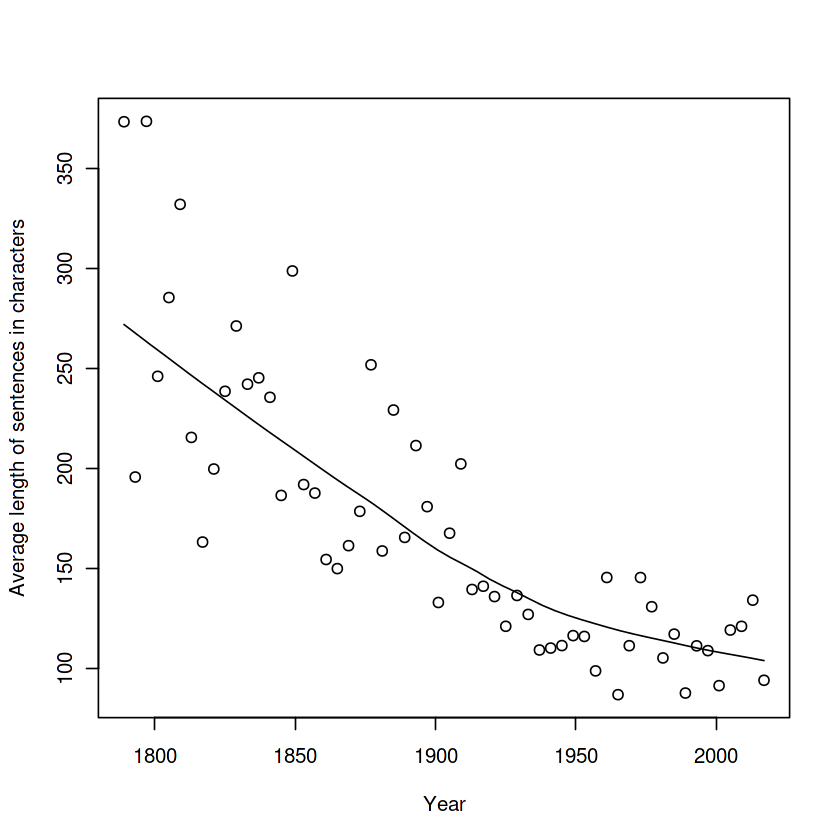

In [18]:
sntcl.year <- aggregate(len~Year,data=sntcl,mean)
with(sntcl.year,
     scatter.smooth(Year,len,ylab="Average length of sentences in characters"))

In [19]:
inaugural_ <- corpus_reshape(data_corpus_inaugural,
                             to="documents")
all(inaugural_$Year == data_corpus_inaugural$Year)

[1] TRUE